# Exploratory Data Analysis (EDA) for Marketiing Campaign
- Generate insights for Marketing Intelligence.
- Plotting Different Interactive Charts which gives Understanding of Marketing Campaign. (Exploring Altair Library)


In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
# alt.renderers.enable('notebook')
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [2]:
# Reading and Loading Data from the system.
df = pd.read_csv('./marketing_campaigns.csv',sep=';')
df.head()

Week   Campaign  Visits    Revenue       Cost
0     1  Aldebaran      27   2.269511   3.763627
1     2  Aldebaran      64  10.820403  15.322613
2     3  Aldebaran      80   7.132998  10.753533
3     4  Aldebaran      93  11.085813  16.906191
4     5  Aldebaran     120  14.282481  21.446570

In [18]:
# Calculating Necessary values per Campaign like Profit per Week, Revenue Growth, Revenue per Visit, Cost per Visit,
# ROI,Cumulative ROI,Cumulative Revenue Growth.
CampaighNames = list(df.Campaign.unique())
finalList = []
for campaign in range(len(CampaighNames)):
    ndf = df.loc[df.Campaign == CampaighNames[campaign]]
    ndf['Profit per Week'] = ndf.Revenue - ndf.Cost
    ndf['Revenue Growth'] = ndf.Revenue.diff()
    ndf['Revenue per Visit'] = ndf.Revenue / ndf.Visits
    ndf['Cost per Visit'] = ndf.Cost / ndf.Visits
    ndf = ndf.fillna(0)
    ndf['Revenue Growth'] = ndf['Revenue Growth']*100
    ndf['ROI(%)'] = (ndf.Revenue - ndf.Cost)*100/ndf.Cost
    ndf['Cumulative ROI(%)'] = np.cumsum(ndf['ROI(%)'].values)
    ndf = ndf.fillna(0)
    ndf['Cumulative Revenue Growth'] = np.cumsum(ndf['Revenue Growth'].values)
    ndf['Ratio of Revenue per Visit to Cost per Visit'] = ndf['Revenue per Visit'] / ndf['Cost per Visit']
    finalList.append(ndf)
fdf = pd.concat(finalList)

C:\Users\Vedant\Anaconda3\envs\TF\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Vedant\Anaconda3\envs\TF\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Vedant\Anaconda3\envs\TF\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [4]:
fdf.head()

Week   Campaign  Visits    Revenue       Cost  Profit per Week  \
0     1  Aldebaran      27   2.269511   3.763627        -1.494116   
1     2  Aldebaran      64  10.820403  15.322613        -4.502210   
2     3  Aldebaran      80   7.132998  10.753533        -3.620535   
3     4  Aldebaran      93  11.085813  16.906191        -5.820379   
4     5  Aldebaran     120  14.282481  21.446570        -7.164089   

   Revenue Growth  Revenue per Visit  Cost per Visit     ROI(%)  \
0        0.000000           0.084056        0.139394 -39.698824   
1      855.089195           0.169069        0.239416 -29.382782   
2     -368.740532           0.089162        0.134419 -33.668332   
3      395.281487           0.119202        0.181787 -34.427498   
4      319.666799           0.119021        0.178721 -33.404358   

   Cumulative ROI(%)  Cumulative Revenue Growth  \
0         -39.698824                   0.000000   
1         -69.081606                 855.089195   
2        -102.749939                 486.348663   
3        -137.177436                 881.630150   
4        -170.581794                1201.296949   

   Ratio of Revenue per Visit to Cost per Visit  
0                                      0.603012  
1                                      0.706172  
2                                      0.663317  
3                                      0.655725  
4                                      0.665956

#### (a) Overview of entire market's development and the different campaigns. Below charts summarizes the most important findings.
- Here I have plotted different charts which give insights about the data. Please note that the below plotted charts are Interactive plots. That means if you select and drag on the charts it updates the values according to the selection. That way it would also give information about the paarameters how it varries over the week.
1. Revenue, Cost Chart gives and information how the cost and revenue for different campaigns are varying over the week. In this chart the dots represents the cost chart and line represents revenue chart. In that we can observe that for Campaign Cottington till 21 Week Revenue genereted is more than the cost and reverse from 22 Week. Which implies Cottington campaign is having profit till 21 Week and Loss from Week 22 onwards. For Aldebaran Campaign till 20 Week Cost is higher than the Revenue and reverse for the 21 Week onwards. Which implies Aldebaran compaign is having the profit from 21 Week onwards and Loss till 21 Week. For Bartledan campaign throughout cost is higher than the revenue. Which implies that Bartledan campaign is in Loss throughout the week. And that can be validated from the ROI Chart. 
2. Visit Chart gives and information regarding the Visits to the campaign over Week. From this plot we can infer that for Aldebaran Campaign Visits increase almost linearly over the Weeks, for Cottington campaign the Visit almost remains constant over the Weeks span and Bartledan campaign have increase in number visits over weeks however, the increase is rather slow compared to Aldebaran Campaign.
3. Profit chart gives information how much profit each campaign has made ovwer the weeks. And we can see that till 31 Week Cottington campaign is having higher profit to compare to other campaigns. Aldebaran is having relatively small profit and Bartledan campaign is in Loss till 31 Week.
4. ROI Chart gices information as only Cottington campaign has ROI in positive and other campaign haves ROI in negative. 
5. Revenue per visit and Cost per vist bar chart gives and information how much capital investment each campaign is needed and how much revenue can be generated for that campaign. As for the cost per visit for Aldebaran is lowest and highest for the Cottington campaign. As well as over the weeks cost per visits increases for each campaign however revenue per visits decreases for the campaigns Bartledan and Cottington and increases for the Aldebaran Campaign.


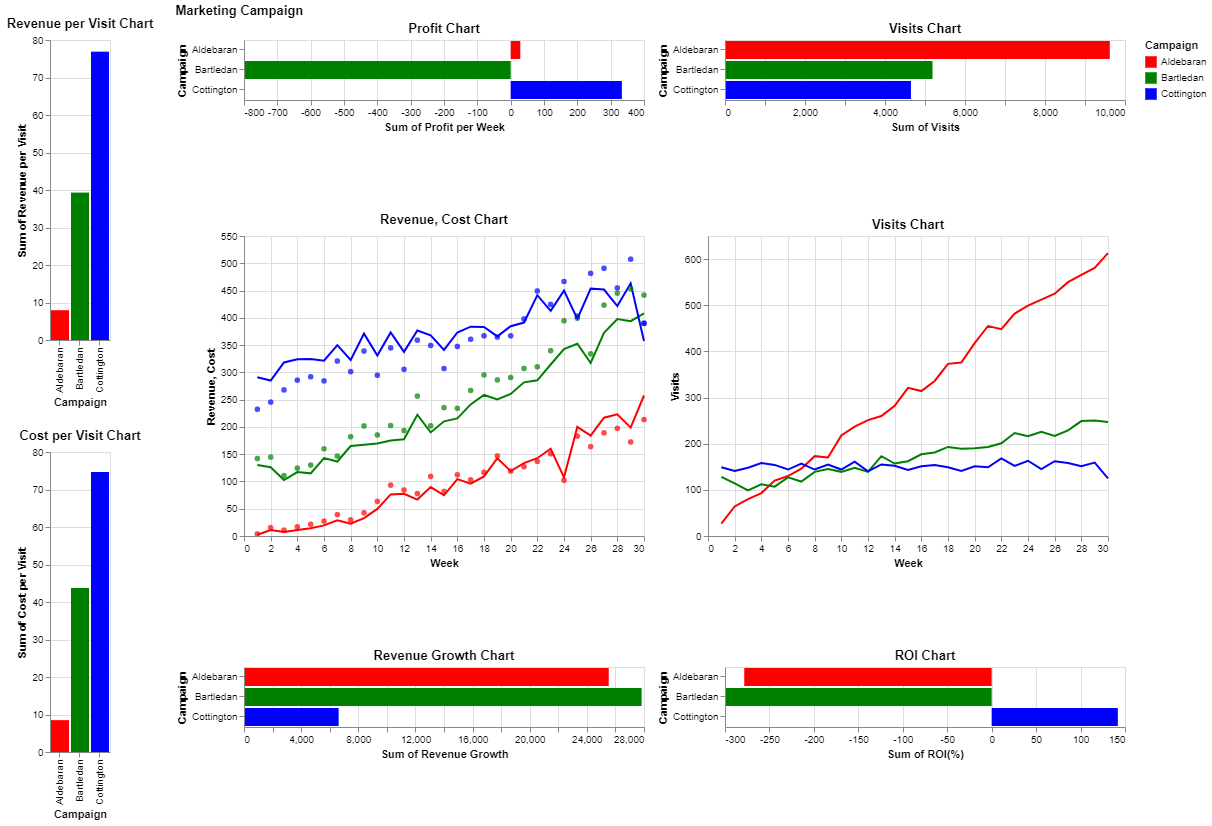

In [5]:
domain=['Aldebaran', 'Bartledan', 'Cottington']
range_=['red', 'green', 'blue']
scale = alt.Scale(domain=['Aldebaran', 'Bartledan', 'Cottington'],range=['red', 'green', 'blue'])
color = alt.Color('Campaign:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])
plot3 = alt.Chart(title='Revenue, Cost Chart').mark_circle().encode(
    y= 'Cost:Q',
    x='Week:Q',
    color=alt.Color('Campaign:N', scale=alt.Scale(domain=domain, range=range_)),
    tooltip=['Campaign','Cost','Visits']
).properties()

plot5 = alt.Chart(title='Revenue, Cost Chart').mark_line().encode(
    y= 'Revenue:Q',
    x='Week:Q',
    color=alt.Color('Campaign', scale=alt.Scale(domain=domain, range=range_)),
    tooltip=['Campaign','Revenue','Visits']
).properties().add_selection(
    brush
).transform_filter(
    click
)

plot7 = alt.Chart(title='Visits Chart').mark_line().encode(
    x= 'Week:Q',
    y='Visits:Q',
    color=alt.Color('Campaign', scale=alt.Scale(domain=domain, range=range_)),
    tooltip=['Campaign','Cost','Visits']
).properties().add_selection(
    brush
).transform_filter(
    click
)

plot8 = plot5 + plot3

plot9 = alt.Chart(title='Revenue Growth Chart').mark_bar().encode(
    x='sum(Revenue Growth):Q',
    y='Campaign:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties().add_selection(
    click
)
plot10 = alt.Chart(title='ROI Chart').mark_bar().encode(
    x='sum(ROI(%)):Q',
    y='Campaign:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties().add_selection(
    click
)
plot11 = alt.Chart(title='Profit Chart').mark_bar().encode(
    x='sum(Profit per Week):Q',
    y='Campaign:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties().add_selection(
    click
)
plot12 = alt.Chart(title='Visits Chart').mark_bar().encode(
    x='sum(Visits):Q',
    y='Campaign:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties().add_selection(
    click
)

plot13 = alt.hconcat(plot11, plot12, spacing=10)
plot14 = alt.hconcat(plot9, plot10, spacing=10)
plot15 = alt.hconcat(plot8, plot7)
plot16 = alt.vconcat(plot13,plot15,plot14,spacing=80,title="Marketing Campaign")

plot17 = alt.Chart(title='Revenue per Visit Chart').mark_bar().encode(
    y='sum(Revenue per Visit):Q',
    x='Campaign:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties().add_selection(
    click
)

plot18 = alt.Chart(title='Cost per Visit Chart').mark_bar().encode(
    y='sum(Cost per Visit):Q',
    x='Campaign:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties().add_selection(
    click
)

plot19 = alt.vconcat(plot17,plot18)
plot20 = alt.hconcat(plot19,plot16, data=fdf)
plot20

6. The below plot of ROI per week shows how the trend of ROI is changing every week. For campaign Cottington ROI every week is in positive till 21 Week and negative from 21 Week onwards. That can be validated from the cummulative sum of ROI chart which shows negative trend for Cottington campaign from 21 Week onwards. For Alderbaran ROI over the week is in positive from 20 Week onwards which is also validarted in Cummulative sum of ROI Chart. And Bartledan campaign has ROI per week which has always remained in negative.  

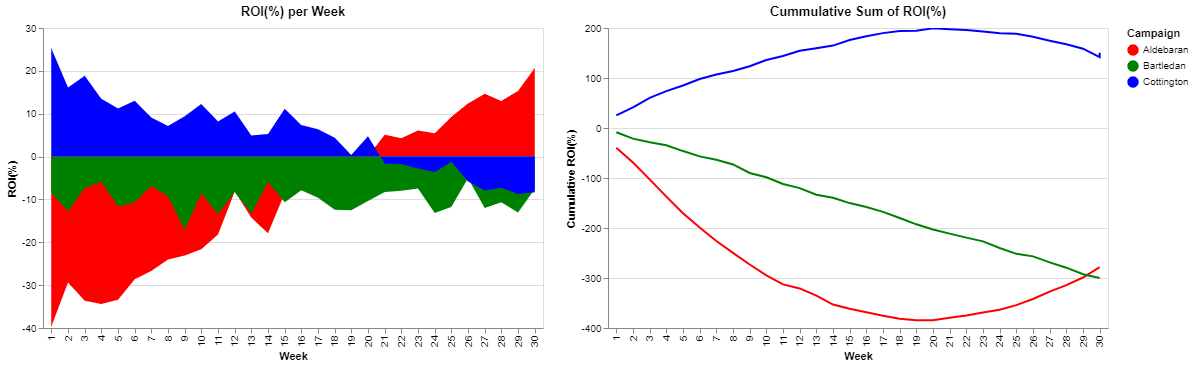

In [6]:

# plot 1 Shows how ROI is changing per week.
plot1 = alt.Chart(fdf, title='ROI(%) per Week').mark_area().encode(
    x= 'Week:N',
    y=alt.Y('ROI(%):Q', stack=None),
    color=alt.Color('Campaign', scale=alt.Scale(domain=domain, range=range_)),
    tooltip=['Visits','Cost','Revenue']
).properties(height=300, width=500).interactive()

# plot 2 shows overall (cumulative) ROI per Week.
plot2 = alt.Chart(fdf, title='Cummulative Sum of ROI(%)').mark_line().encode(
    x= 'Week:N',
    y='Cumulative ROI(%):Q',
    color=alt.Color('Campaign', scale=alt.Scale(domain=domain, range=range_)),
    tooltip=['Visits','Cost','Revenue']

).properties(height=300, width=500).interactive()

plotTemp1 = alt.hconcat(plot1,plot2)
plotTemp1

#### (b) The development of the quality of traffic (revenue per visitor)
- In below chart line represents Revenue per visits and dots represents Cost per visit for each campaign.
- As from the graph it is evident that for capmaigns Cottington and Bartledan Revenue per visit is slowing down and for Campaign Alderbaran Revenue per visit is speeding up (increasing) over the last few weeks.

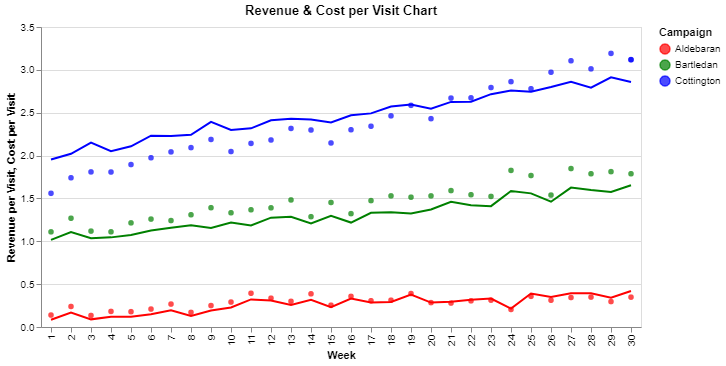

In [7]:
plot21 = alt.Chart(fdf, title='Revenue & Cost per Visit Chart').mark_line().encode(
    x= 'Week:N',
    y='Revenue per Visit:Q',
    color=alt.Color('Campaign', scale=alt.Scale(domain=domain, range=range_)),
    tooltip=['Visits','Revenue']
).properties().interactive()

plot22 = alt.Chart(fdf, title='Revenue & Cost per Visit Chart').mark_circle().encode(
    x= 'Week:N',
    y='Cost per Visit:Q',
    color=alt.Color('Campaign', scale=alt.Scale(domain=domain, range=range_)),
    tooltip=['Visits','Cost','Revenue']

).properties().interactive()

plot2122 = plot21+plot22
plot2122

#### (c) Help Business Developer for the market to invest an additional 250 euro per week from 31 onwards.
- My advice would be to invest additional 250 euro to Aldebaran Campaign as we follow last 10 weeks analysis for the Aldebaran Campaign we can see that the trend is ROI per week is positive as well as Revenue per visit is hig and getting increased compared to Cost per visit. Apart from that compaign is also having overall profit till 31 weeks in positive value. As we can see in the above Chart which gives information about Ratio of Revenue per Visit to Cost per Visit that for Alderbaran Campiagn it is more than 1 for last 10 week and from that we can anticipate the trend for the next few weeks and it will remain more than 1.
- For the overall performance in the market for investing additional 250 euro to the Aldebaran Campaign would be benefitial for the same campaign as the highest revenue generated by the same campaign is around 257 euro and highest cost campaign barries is around 213 euro so additional 250 euro to the campaign will result in good overall increase in revenue as well.

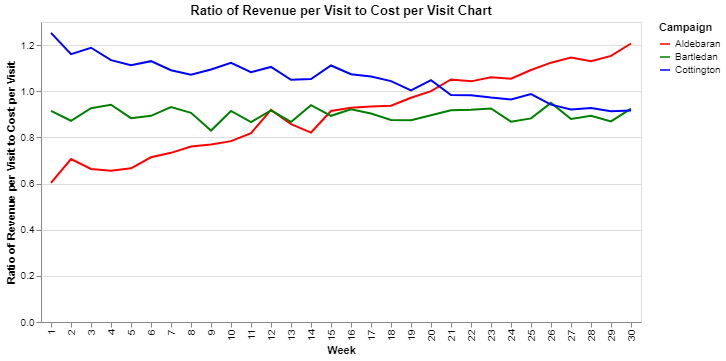

In [8]:
plot32 = alt.Chart(fdf, title='Ratio of Revenue per Visit to Cost per Visit Chart').mark_line().encode(
    x= 'Week:N',
    y='Ratio of Revenue per Visit to Cost per Visit:Q',
    color=alt.Color('Campaign', scale=alt.Scale(domain=domain, range=range_)),
    tooltip=['Visits','Cost','Revenue']

).properties().interactive()
plot32

### Session Data
- Here clickout shows how many time user was lead to the payment portal and booking shows whether user converted it to booking at payment portal.

#### Hypothesis:
- from plot24 we can observe that whenever booking has happend for less than 6 clikouts user has taken less than 4 minites. As well as as time increases from 4 to 6 minutes user has less or equal to 4 clickouts.
- And from plot 29 we can see that for the less than 1 minute we have higer booking compare to no booking.
- And at 0 Second we have highest number of booking. which can be interprets that user already have finalised the choice earlier and he/she is now sure to have bookings. 


In [9]:
dff = pd.read_csv('./session_data.csv',sep=';')

In [10]:
dff['session_start_text'] =  pd.to_datetime(dff['session_start_text'], format='%H:%M:%S')
dff['session_end_text'] =  pd.to_datetime(dff['session_end_text'], format='%H:%M:%S')
dff['Time_Difference'] = dff.session_end_text - dff.session_start_text
dff['Minutes'] = dff['Time_Difference'].dt.total_seconds().div(60).astype(int)
dff['Time_Difference'] = dff['Time_Difference'].dt.total_seconds()
dff = dff.loc[dff.Time_Difference >= 0]
dff.Time_Difference.min(), dff.Time_Difference.max()

(0.0, 378.0)

In [11]:
dff.head()

session  session_start_text    session_end_text  clickouts  booking  \
0  20170503000001 1900-01-01 06:11:53 1900-01-01 06:15:11          3        0   
1  20170503000002 1900-01-01 21:06:41 1900-01-01 21:08:23          3        0   
2  20170503000003 1900-01-01 12:03:01 1900-01-01 12:06:02          3        0   
3  20170503000004 1900-01-01 05:58:00 1900-01-01 06:02:56          0        0   
4  20170503000005 1900-01-01 09:13:43 1900-01-01 09:17:01          1        0   

   Time_Difference  Minutes  
0            198.0        3  
1            102.0        1  
2            181.0        3  
3            296.0        4  
4            198.0        3

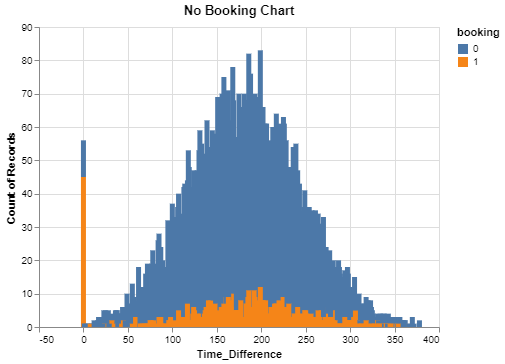

In [12]:
# Plot shows the bookings happend or not at different time difference for session and their frequency.
plot23 = alt.Chart(dff, title='No Booking Chart').mark_bar().encode(
    x='Time_Difference:Q',
    y='count():N',
    color= 'booking:N'
)
plot23

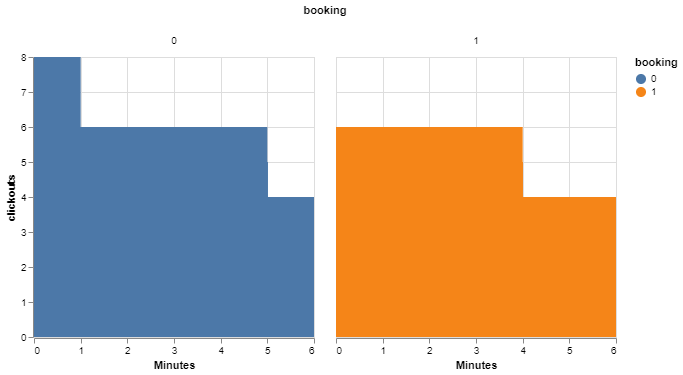

In [13]:
plot24 = alt.Chart(dff).mark_rect().encode(
    x='Minutes:Q',
    y='clickouts:Q',
    color='booking:N',
    column='booking:N'
).properties(width=280,height=280)
plot24.configure_header(
    titleColor='green',
    titleFontSize=14,
    labelColor='red',
    labelFontSize=14)
plot24

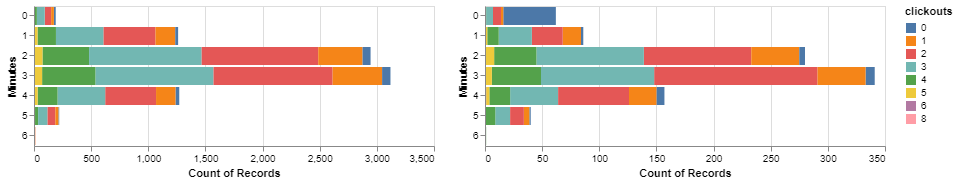

In [14]:
plot25 = alt.Chart(dff.loc[dff.booking == 0]).mark_bar().encode(
    y='Minutes:N',
    x='count()',
    color='clickouts:N'
)

plot26 = alt.Chart(dff.loc[dff.booking == 1]).mark_bar().encode(
    y='Minutes:N',
    x='count()',
    color='clickouts:N'
)
plot25 | plot26

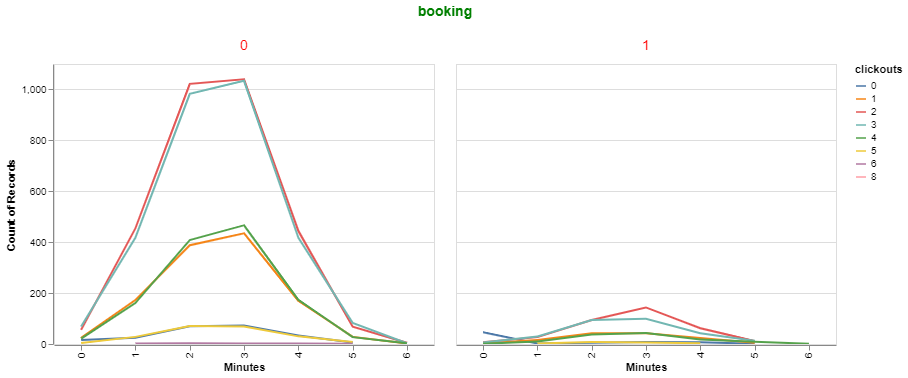

In [15]:
# shows journey as '2' clickouts counts increases till 3 minutes in booking : yes and no case.

selector = alt.selection_single(empty='all', fields=['clickouts'])
plot27 = alt.Chart(dff.groupby(by=['Minutes','booking', 'clickouts'], as_index=False).count()).properties(
    width=250,
    height=250
).add_selection(selector)
plot28 = plot27.mark_line().encode(
    x='Minutes:N',
    y=alt.Y('session:Q', title='Count of Records'),
    color='clickouts:N',
    column='booking:N',
    tooltip=['clickouts','session']
).properties(width=380,height=280).interactive().transform_filter(
    selector
)
plot28.configure_header(
    titleColor='green',
    titleFontSize=14,
    labelColor='red',
    labelFontSize=14)


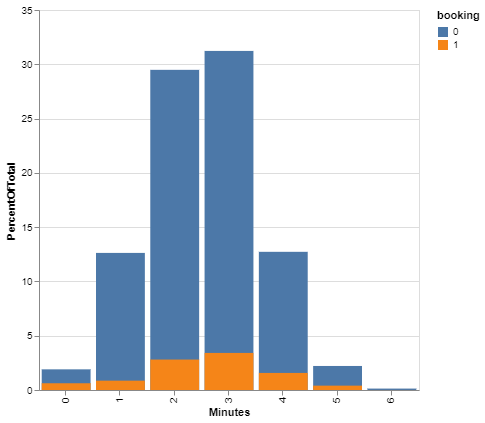

In [16]:
plot29 = alt.Chart(dff.groupby(by=['Minutes','booking'], as_index=False).count()).mark_bar().encode(
    x='Minutes:N',
    y=alt.Y('PercentOfTotal:Q', stack=None),
    color='booking:N',
).properties(width=380,height=380).interactive().transform_window(
    window=[alt.WindowFieldDef(op='sum', field='session', **{'as': 'TotalTime'})],
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.session / datum.TotalTime * 100"
)
plot29


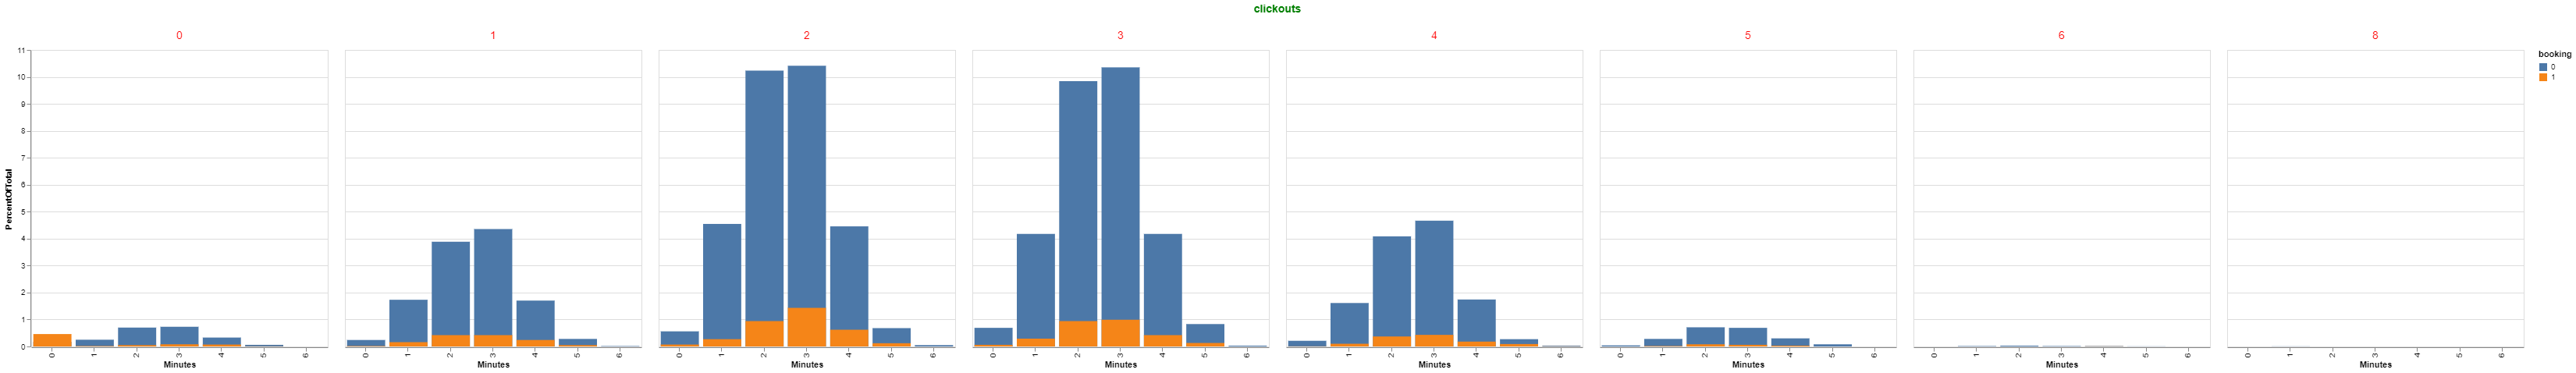

In [17]:
plot30 = alt.Chart(dff.groupby(by=['Minutes','booking','clickouts'], as_index=False).count()).mark_bar().encode(
    x='Minutes:N',
    y=alt.Y('PercentOfTotal:Q', stack=None),
    color='booking:N',
    column='clickouts:N'
).properties(width=380,height=380).transform_window(
    window=[alt.WindowFieldDef(op='sum', field='session', **{'as': 'TotalTime'})],
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.session / datum.TotalTime * 100"
)
plot30.configure_header(
    titleColor='green',
    titleFontSize=14,
    labelColor='red',
    labelFontSize=14)